In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import wb


countries = wb.get_countries()
df = wb.download(indicator="SP.DYN.LE00.IN", country=countries['iso2c'], start='1980', end='2020')
df.reset_index(inplace=True)
df.rename(columns={'SP.DYN.LE00.IN':'lifespan'}, inplace=True)
df = df.pivot(index='country', columns='year', values='lifespan')
df.head(2)

/home/tatyana/.local/lib/python3.6/site-packages/pandas_datareader/wb.py:593: UserWarning: Non-standard ISO country codes: 1A, 1W, 4E, 6D, 6F, 6L, 6N, 6X, 7E, 8S, A4, A5, A9, B1, B2, B3, B4, B6, B7, B8, C4, C5, C6, C7, C8, C9, D2, D3, D4, D5, D6, D7, D8, D9, EU, F1, F6, JG, L4, L5, L6, L7, M1, M2, N6, O6, OE, R6, S1, S2, S3, S4, T2, T3, T4, T5, T6, T7, V1, V2, V3, V4, XC, XD, XE, XF, XG, XH, XI, XJ, XK, XL, XM, XN, XO, XP, XQ, XT, XU, XY, Z4, Z7, ZB, ZF, ZG, ZJ, ZQ, ZT
  "Non-standard ISO " "country codes: %s" % tmp, UserWarning


year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,43.244,43.923,44.617,45.324,46.040,46.761,47.486,48.211,48.930,49.64,...,61.553,62.054,62.525,62.966,63.377,63.763,64.130,64.486,NaN,NaN
Albania,70.208,70.416,70.635,70.876,71.134,71.388,71.605,71.760,71.843,71.86,...,76.914,77.252,77.554,77.813,78.025,78.194,78.333,78.458,NaN,NaN


In [2]:
df.isnull().sum().sum()

1301

In [3]:
df.dropna(how='all', axis=1, inplace=True)
df.dropna(how='all', axis=0, inplace=True)
df.isnull().sum().sum()

383

In [4]:
df.dropna(how='any', axis=0, inplace=True)
df.isnull().sum().sum()

0

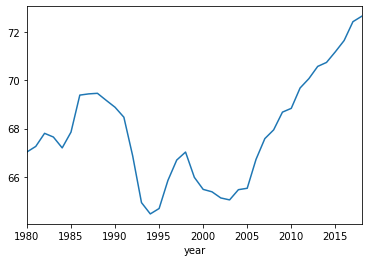

In [13]:
df.loc['Russian Federation'].plot()

# построить график двух стран (любых)
# построить графики 5 стран с самой низкой средней продолжительностью жизни

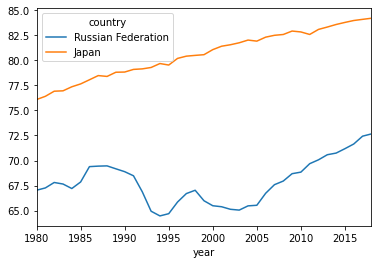

In [14]:
df.loc[['Russian Federation', 'Japan']].transpose().plot()

In [23]:
df['Mean'] = df.mean(axis=1)
df.head()
df_top5 = df.sort_values(by='Mean').tail()
df_top5

year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Mean
country,,,,,,,,,,,,,,,,,,,,,
Switzerland,75.459268,75.693171,76.033902,76.031220,76.608537,76.733659,76.899024,77.197561,77.226585,77.421220,...,82.246341,82.695122,82.697561,82.797561,83.197561,82.897561,83.602439,83.551220,83.753659,79.677305
"Macao SAR, China",73.974000,74.330000,74.677000,75.020000,75.362000,75.702000,76.036000,76.363000,76.680000,76.990000,...,82.704000,82.938000,83.158000,83.361000,83.543000,83.707000,83.854000,83.989000,84.118000,79.697462
Iceland,76.846585,76.521463,77.037805,76.845610,77.576585,77.602439,77.990732,77.339024,77.082927,78.140976,...,81.897561,82.358537,82.917073,82.060976,82.860976,82.468293,82.204878,82.660976,82.860976,79.823815
"Hong Kong SAR, China",74.673171,75.324390,75.429268,75.275610,76.029268,76.434146,76.685366,76.882927,77.082927,77.029268,...,82.978049,83.421951,83.480488,83.831707,83.980488,84.278049,84.226829,84.680488,84.934146,80.090557
Japan,76.091707,76.414390,76.922927,76.961463,77.365366,77.650488,78.064634,78.483659,78.399268,78.818049,...,82.842683,82.591220,83.096098,83.331951,83.587805,83.793902,83.984878,84.099756,84.210976,80.618881


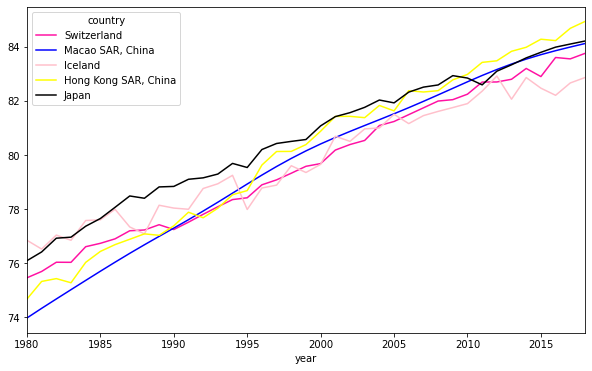

In [33]:
years = list(map(str, range(1980, 2019)))
df_top5[years].transpose().plot(figsize=(10, 6), color=['#FF11A3', 'blue', 'pink', 'yellow', 'black'])


In [32]:
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt

for name, hex in mpl.colors.cnames.items():
    print(name, hex)

aliceblue #F0F8FF
antiquewhite #FAEBD7
aqua #00FFFF
aquamarine #7FFFD4
azure #F0FFFF
beige #F5F5DC
bisque #FFE4C4
black #000000
blanchedalmond #FFEBCD
blue #0000FF
blueviolet #8A2BE2
brown #A52A2A
burlywood #DEB887
cadetblue #5F9EA0
chartreuse #7FFF00
chocolate #D2691E
coral #FF7F50
cornflowerblue #6495ED
cornsilk #FFF8DC
crimson #DC143C
cyan #00FFFF
darkblue #00008B
darkcyan #008B8B
darkgoldenrod #B8860B
darkgray #A9A9A9
darkgreen #006400
darkgrey #A9A9A9
darkkhaki #BDB76B
darkmagenta #8B008B
darkolivegreen #556B2F
darkorange #FF8C00
darkorchid #9932CC
darkred #8B0000
darksalmon #E9967A
darkseagreen #8FBC8F
darkslateblue #483D8B
darkslategray #2F4F4F
darkslategrey #2F4F4F
darkturquoise #00CED1
darkviolet #9400D3
deeppink #FF1493
deepskyblue #00BFFF
dimgray #696969
dimgrey #696969
dodgerblue #1E90FF
firebrick #B22222
floralwhite #FFFAF0
forestgreen #228B22
fuchsia #FF00FF
gainsboro #DCDCDC
ghostwhite #F8F8FF
gold #FFD700
goldenrod #DAA520
gray #808080
green #008000
greenyellow #ADFF2F


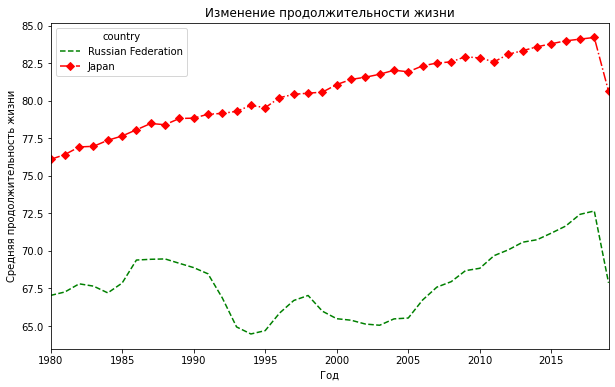

In [35]:
df.loc[['Russian Federation', 'Japan']].transpose().plot(figsize=(10, 6), style=['g--', 'r-.D'])

plt.title('Изменение продолжительности жизни')
plt.ylabel('Средняя продолжительность жизни')
plt.xlabel('Год')

plt.show()

In [37]:
# area plot
dfa = pd.DataFrame({'1st q': [120, 30], '2nd q': [100, 200], '3rd q': [80, 50], '4th q': [50, 500]}, index = ['A', 'B']).transpose()
dfa


,A,B
1st q,120,30
2nd q,100,200
3rd q,80,50
4th q,50,500


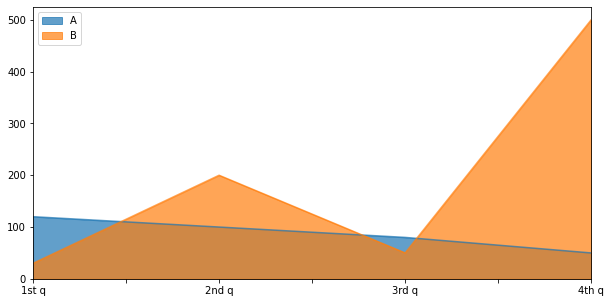

In [42]:
dfa.plot(kind='area', figsize=(10, 5), stacked=False, alpha=0.7)

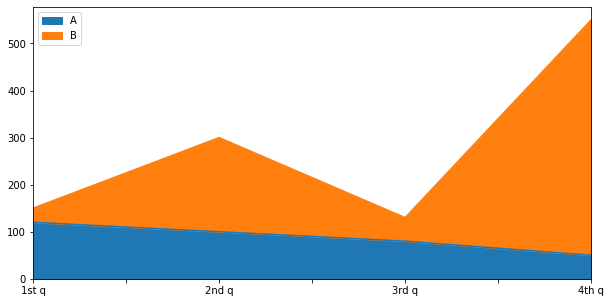

In [41]:
dfa.plot(kind='area', figsize=(10, 5), stacked=True)

In [45]:
# создать df по листу 'Canada by Citizenship'
df = pd.read_excel('/home/tatyana/Загрузки/Canada.xlsx', sheet_name='Canada by Citizenship', skiprows=range(20),
                       skipfooter=2)
df.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage', 'RegName'], axis=1, inplace=True)
df.head()
df.rename(columns={'OdName':'Country', 'AreaName':'Continent'}, inplace=True)
# Построить area plot для трех стран с самым высоким значением в колонке Total (stacked == False)

,OdName,AreaName,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


In [47]:
df.set_index('Country', inplace=True)

In [48]:
df['Total'] = df.sum(axis=1)
df.head()

,Continent,DevName,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Developing regions,16,39,39,47,71,340,496,741,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Developed regions,1,0,0,0,0,0,1,2,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Developing regions,80,67,71,69,63,44,69,132,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Developing regions,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Developed regions,0,0,0,0,0,0,2,0,...,0,1,1,0,0,0,0,1,1,15


In [49]:
years = list(range(1980, 2013))
df['Mean'] = round(df[years].mean(axis=1))
df.head()

,Continent,DevName,1980,1981,1982,1983,1984,1985,1986,1987,...,2006,2007,2008,2009,2010,2011,2012,2013,Total,Mean
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Developing regions,16,39,39,47,71,340,496,741,...,3009,2652,2111,1746,1758,2203,2635,2004,58639,1716.0
Albania,Europe,Developed regions,1,0,0,0,0,0,1,2,...,856,702,560,716,561,539,620,603,15699,457.0
Algeria,Africa,Developing regions,80,67,71,69,63,44,69,132,...,4807,3623,4005,5393,4752,4325,3774,4331,69439,1973.0
American Samoa,Oceania,Developing regions,0,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,6,0.0
Andorra,Europe,Developed regions,0,0,0,0,0,0,2,0,...,1,1,0,0,0,0,1,1,15,0.0


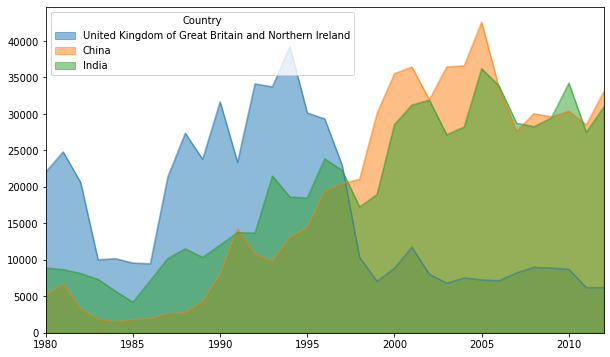

In [52]:
top_3 = df.sort_values(by='Total')[-3:]
top_3[years].transpose().plot(kind='area', stacked=False, figsize=(10, 6))